In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/shipping_data.csv')
df_modified = df

In [3]:
df_modified = df_modified.drop(columns=['Warehouse_block', 'Customer_care_calls','Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender'])

In [6]:
df_modified.head()

,ID,Mode_of_Shipment,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,Flight,177,44,1233,1
1,2,Flight,216,59,3088,1
2,3,Flight,183,48,3374,1
3,4,Flight,176,10,1177,1
4,5,Flight,184,46,2484,1


In [17]:
print(df_modified['Mode_of_Shipment'].value_counts())
print(df_modified['Reached.on.Time_Y.N'].value_counts())

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [26]:
shipment_delays = df_modified.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack()
print(shipment_delays)

delay_percentage = df_modified[df_modified['Reached.on.Time_Y.N'] == 0].groupby('Mode_of_Shipment').size() / df_modified.groupby('Mode_of_Shipment').size() * 100
print(delay_percentage)

Reached.on.Time_Y.N         0         1
Mode_of_Shipment                       
Flight               0.398424  0.601576
Road                 0.411932  0.588068
Ship                 0.402439  0.597561
Mode_of_Shipment
Flight    39.842431
Road      41.193182
Ship      40.243902
dtype: float64


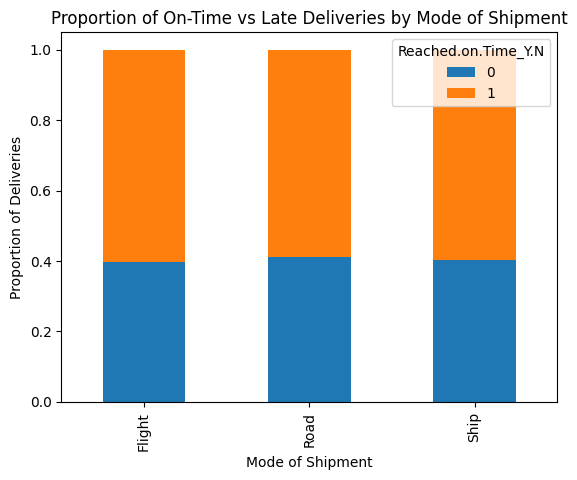

In [27]:
import matplotlib.pyplot as plt
shipment_delays.plot(kind='bar', stacked=True)
plt.title('Proportion of On-Time vs Late Deliveries by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Proportion of Deliveries')
plt.show()